# #Part 1: Regenerate Data and Create Detailed Subplot

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read the mouse data and the study results
mouse = pd.read_csv('../Resources/Mouse_metadata.csv')
study = pd.read_csv('../Resources/Study_results.csv')

# Display the mouse data
mouse.head()

# Display the study data
study.head()

# Combine the data into a single dataset and display it
study_data_complete = pd.merge(study, mouse, how="left", on="Mouse ID")
study_data_complete.head()

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

# Create a clean DataFrame by dropping the duplicate mouse by its ID and display it
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


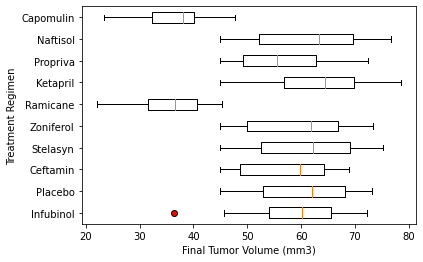

In [34]:
# Determine the final timepoint for each mouse.

# Start by getting the greatest timepoint for each mouse
max_tumor = clean_study_data_complete.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
max_tumor.head()

# Join the newly created `.max()` dataframe to the dataframe from Part 1
merged_data = max_tumor.merge(clean_study_data_complete, on=['Mouse ID', 'Timepoint'], how='left')
merged_data.head()

# Create a list with all 10 drug regimens.
treatment_list = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']

# Create a empty list to fill with the tumor vol data
tumor_vol_list = []
name=[]

# Isolate (filter) each mice on each drug to collect their tumor volume.
for drug in treatment_list:

    # Locate the rows which match the drug and get the final tumor volumes of all mice
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    drug_name = merged_data.loc[merged_data['Drug Regimen'] == drug]['Drug Regimen']
   
    # Append the outcome to the empty list previously created.
    tumor_vol_list.append(final_tumor_vol)
    name.append(drug_name)
# Create a boxplot that visualizes the final tumor volume of all mice in the study across all drug regimens.

# Define a custom shape for all outliers in the visualization
red_circle = dict(markerfacecolor='r', marker='o')

# Create a boxplot that visualizes the final tumor volume of all mice in the study across all drug regimens.

# Define a custom shape for all outliers in the visualization
red_circle = dict(markerfacecolor='r', marker='o')

# Create horizontal box and whisker plot

plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=red_circle, vert=False)
plt.xlabel('Final Tumor Volume (mm3)')
plt.ylabel('Treatment Regimen')
plt.show()
   





###### Create a figure with 2x2 subplot

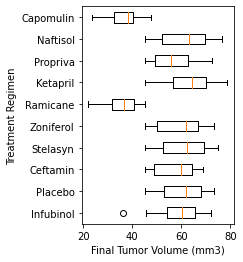

In [4]:
plt.subplot(1,2,1)
plt.boxplot(tumor_vol_list, labels = treatment_list,vert=False)
plt.xlabel('Final Tumor Volume (mm3)')
plt.ylabel('Treatment Regimen')
plt.show()

In [5]:
# 3. For the second plot within the subplot, create a horizontal bar chart that shows the largest final tumor volume 
# for each drug regimen.

max_volume=[]
for each in tumor_vol_list:
    y=max(each)
    max_volume.append(y)
    
treatment_list  # y-axis 
max_volume      # x-axis
y_pos=np.arange(len(treatment_list))


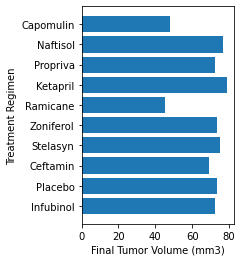

In [63]:

plt.subplot(1,2,2)
plt.barh(treatment_list,max_volume)
plt.xlabel('Final Tumor Volume (mm3)')
plt.ylabel('Treatment Regimen')
plt.show()

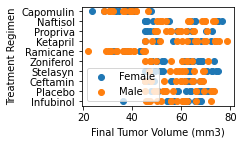

In [64]:
# 4 For the third plot within the subplot, create a scatter plot that shows final tumor volume by drug regimen 
# and colored by the mouse Sex.
plt.subplot(2,2,3)
y=merged_data['Drug Regimen']
x=merged_data['Tumor Volume (mm3)']
z=merged_data['Sex']

groups=merged_data.groupby('Sex')
for name,group in groups:
    plt.scatter(group['Tumor Volume (mm3)'],group['Drug Regimen'],label=name)

plt.xlabel('Final Tumor Volume (mm3)')
plt.ylabel('Treatment Regimen')
plt.legend()
plt.show()
   

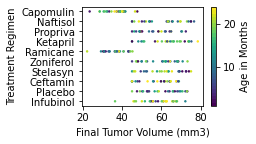

In [68]:
#5 For the fourth plot within the subplot, create a scatter plot that shows “final tumor volume” by “drug regimen” and
#that colors the data points by using the age of the mice.

plt.subplot(2,2,4)
#fig, ax = plt.subplots()
y=merged_data['Drug Regimen']
x=merged_data['Tumor Volume (mm3)']
cr=merged_data['Age_months']
plt.scatter(x,y,s=2,c=cr,cmap=plt.cm.get_cmap("viridis",30))
cbar=plt.colorbar(orientation="vertical")
cbar.set_label(label="Age in Months")
plt.xlabel('Final Tumor Volume (mm3)')
plt.ylabel('Treatment Regimen')
plt.show()
